C:\Users\itzdh\AppData\Local\Temp\ipykernel_7136\35960969.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ypred[i] = xmat[i] * localWeight(xmat[i], xmat, ymat, k)


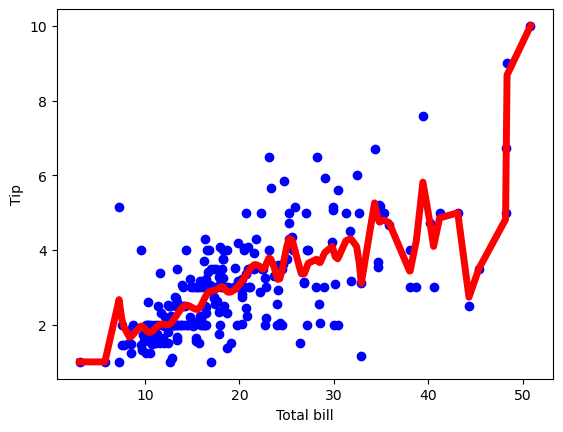

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def kernel(point, xmat, k):
    m, n = np.shape(xmat)
    weights = np.mat(np.eye(m))
    for j in range(m):
        diff = point - xmat[j]
        weights[j, j] = np.exp(np.sum(np.array(diff) * np.array(diff)) / (-2.0 * k**2))
    return weights

def localWeight(point, xmat, ymat, k):
    wei = kernel(point, xmat, k)
    W = (xmat.T * (wei * xmat)).I * (xmat.T * (wei * ymat.T))
    return W

def localWeightRegression(xmat, ymat, k):
    m, n = np.shape(xmat)
    ypred = np.zeros(m)
    for i in range(m):
        ypred[i] = xmat[i] * localWeight(xmat[i], xmat, ymat, k)
    return ypred

data = pd.read_csv('10-dataset.csv')
bill = np.array(data.total_bill)
tip = np.array(data.tip)
mbill = np.mat(bill)
mtip = np.mat(tip)

m = np.shape(mbill)[1]
one = np.mat(np.ones(m))
X = np.hstack((one.T, mbill.T))

ypred = localWeightRegression(X, mtip, 0.5)
SortIndex = X[:, 1].argsort(0)
xsort = X[SortIndex][:, 0]

plt.scatter(bill, tip, color='blue')
plt.plot(xsort[:, 1], ypred[SortIndex], color='red', linewidth=5)
plt.xlabel('Total bill')
plt.ylabel('Tip')
plt.show()
